## Part 3 – Exploratory Data Analysis (EDA) & Visualization

In this section, we explore and visualize the **YouTube Trending Videos in Kenya** dataset after cleaning and preprocessing.  
The goal of this EDA is to uncover patterns, relationships, and insights that can help us understand what drives video popularity and engagement on YouTube in the Kenyan market.

We will focus on:
1. **Category Popularity** – Identifying which video categories appear most often in the trending list.
2. **Engagement Metrics** – Analyzing views, likes, and comments across categories and creators.
3. **Posting Patterns** – Understanding the best days and times for videos to trend.
4. **Creator Analysis** – Highlighting creators who frequently appear in trending.
5. **Description Analysis** – Investigating whether having a description (and its length) affects engagement.
6. **Correlation Matrix of Engagement Metrics** – Checking relationships between views, likes, and comments.
7. **View Count Distribution** – Visualizing how views are distributed across trending videos.
8. **Like Count Distribution** – Analyzing the distribution of likes for trending videos.
9. **Comment Count Distribution** – Analyzing the distribution of comments for trending videos.
10. **Video Length vs View Count** – Grouping videos into duration ranges and analyzing their average view counts.

This analysis will use descriptive statistics, visualizations (Matplotlib, Seaborn, and WordCloud), and group comparisons to present insights in a clear and professional manner.


### Step 1: Importing all required libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Text handling
import re


# Ensure plots render in Jupyter
%matplotlib inline


### Step 2: Load the cleaned dataset

In [2]:
df= pd.read_csv('data/processed/trending_videos_ke_clean.csv')

df.head(5)

,video_id,video_url,title,description,published_at,publish_date,publish_time,day_of_week,hour,channel_id,...,tags,duration,duration_seconds,duration_minutes,definition,caption,view_count,like_count,favorite_count,comment_count
0,R9f4GST2yQQ,https://www.youtube.com/watch?v=R9f4GST2yQQ,Zuchu - Amanda (Visualizer),Get #Amanda Now 👇🏼 https://zuchu.lnk.to/amanda...,2025-08-01 09:57:57+00:00,2025-08-01,09:57:57,Friday,9,UCOn8zDM533kqzhIA8c3NFbQ,...,"['diamond platnumz', 'wana', 'kwaru', 'hakuna ...",PT2M39S,159,2.650000,hd,False,880369,22857,0,2280
1,nb_fFj_0rq8,https://www.youtube.com/watch?v=nb_fFj_0rq8,Avatar: Fire and Ash | Official Trailer,"From Director James Cameron, watch the trailer...",2025-07-28 15:00:09+00:00,2025-07-28,15:00:09,Monday,15,UCgjxQJ6TlKqhHax8742ZMdA,...,[],PT2M26S,146,2.433333,hd,True,19113385,507686,0,28335
2,nYH0vXWZ69k,https://www.youtube.com/watch?v=nYH0vXWZ69k,Live : Kenya vs D.R. Congo | African Nations C...,Live : Kenya vs D.R. Congo | African Nations C...,2025-08-03 16:18:41+00:00,2025-08-03,16:18:41,Sunday,16,UC4P_ujgWcdjfNW2z5eQVMyg,...,"['kenya vs dr congo live football', 'kenya dr ...",PT3H23M15S,12195,203.250000,hd,False,309576,714,0,2
3,qZgEdZFzkVc,https://www.youtube.com/watch?v=qZgEdZFzkVc,MATATA ft. MEJJA - TIKI TAKO [Official Music V...,Matata ft. Mejja – Tikitako (Official Music Vi...,2025-07-25 05:23:48+00:00,2025-07-25,05:23:48,Friday,5,UCJ2XnwRKT0ksT9E1lri1wlg,...,"['Matata ft mejja', 'matata tikitako', 'tiki t...",PT4M2S,242,4.033333,hd,False,1035173,21736,0,1189
4,5r-7eWDBc40,https://www.youtube.com/watch?v=5r-7eWDBc40,GOAT - Official Teaser Trailer (HD),You’re never too small to dream big. From the ...,2025-07-30 12:59:45+00:00,2025-07-30,12:59:45,Wednesday,12,UCz97F7dMxBNOfGYu3rx8aCw,...,[],PT2M14S,134,2.233333,hd,True,27193369,110500,0,7541


### Step 3: Analysis & Visualization

#### A. Category Popularity
**Goal:**
Identify which video ``categories`` appear most frequently in the trending list. This helps us understand what types of content dominate YouTube trends in Kenya.

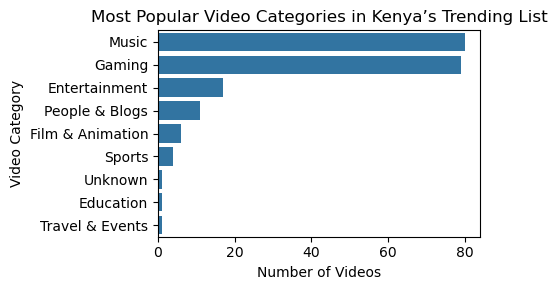

In [41]:
# Total videos per category
category_counts = df['category_name'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']


# Plot
plt.figure(figsize=(5, 3))
sns.barplot(data=category_counts, y='Category', x='Count')
plt.title('Most Popular Video Categories in Kenya’s Trending List')
plt.xlabel('Number of Videos')
plt.ylabel('Video Category')
plt.tight_layout()
plt.show()

#### B. Engagement Metrics
**Goal:**

Analyze how videos perform in terms of ``views``, ``likes``, and ``comments``, and how these metrics vary across categories. This helps us understand viewer behavior and which types of content get the most interaction.

##### 1. Views by Category

In [4]:
# Group categories by average views

avg_category_views= df.groupby('category_name')['view_count'].mean().sort_values(ascending= False).reset_index()

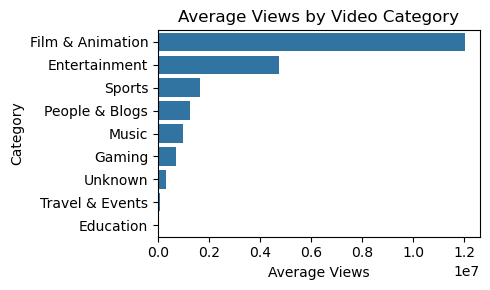

In [40]:
# Plot
plt.figure(figsize=(5, 3))
sns.barplot(data=avg_category_views, x='view_count', y='category_name')
plt.title('Average Views by Video Category')
plt.xlabel('Average Views')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

##### 2. Likes by Category

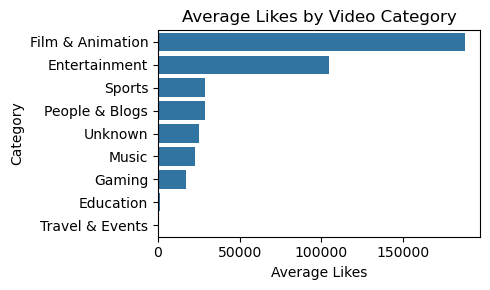

In [38]:
likes_by_category = df.groupby('category_name')['like_count'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(5, 3))
sns.barplot(data=likes_by_category, x='like_count', y='category_name')
plt.title('Average Likes by Video Category')
plt.xlabel('Average Likes')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

##### 3. Comments by Category

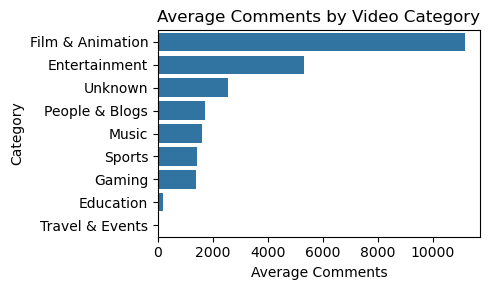

In [37]:
comments_by_category = df.groupby('category_name')['comment_count'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(5, 3))
sns.barplot(data=comments_by_category, x='comment_count', y='category_name')
plt.title('Average Comments by Video Category')
plt.xlabel('Average Comments')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


#### 3. Posting Patterns
```| Analyzing which days and what times videos are most likely to appear on the trending list.```

##### A. Videos per Day of Week
This sub-section focuses on how the frequency of uploads and the total views vary by the day of the week. This helps identify optimal days for publishing videos to maximize reach and engagement.

**Objective:**
To understand whether certain days of the week have more trending video uploads and if those uploads receive higher viewership.

**Chart: Number of Uploads vs Total Views by Day of Week**
Gray bars show the number of uploads on each day.

Teal line shows the total views generated by videos posted on that day.

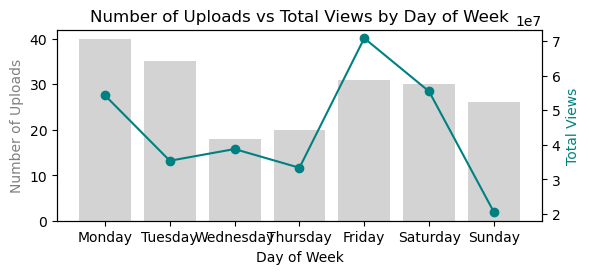

In [36]:
# Group by day of week
views_by_day = df.groupby('day_of_week').agg(
    uploads=('video_id', 'count'),
    total_views=('view_count', 'sum')
).reset_index()

# Reorder days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
views_by_day['day_of_week'] = pd.Categorical(views_by_day['day_of_week'], categories=day_order, ordered=True)
views_by_day = views_by_day.sort_values('day_of_week')

# Plot
fig, ax1 = plt.subplots(figsize=(6, 3))

# Bar plot for uploads
ax1.bar(views_by_day['day_of_week'], views_by_day['uploads'], color='lightgray', label='Number of Uploads')
ax1.set_ylabel('Number of Uploads', color='gray')
ax1.set_xlabel('Day of Week')

# Create second y-axis
ax2 = ax1.twinx()

# Line plot for total views
ax2.plot(views_by_day['day_of_week'], views_by_day['total_views'], marker='o', color='teal', label='Total Views')
ax2.set_ylabel('Total Views', color='teal')

# Title
plt.title('Number of Uploads vs Total Views by Day of Week')
fig.tight_layout()
plt.show()


##### B. Videos per Hour of Day

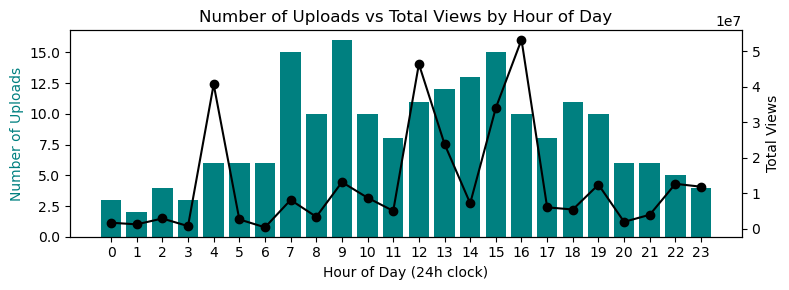

In [35]:
# Group by hour of day
views_by_hour = df.groupby('hour').agg(
    uploads=('video_id', 'count'),
    total_views=('view_count', 'sum')
).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(8, 3))

# Bar plot for uploads (teal)
ax1.bar(views_by_hour['hour'], views_by_hour['uploads'], color='teal', label='Number of Uploads')
ax1.set_ylabel('Number of Uploads', color='teal')
ax1.set_xlabel('Hour of Day (24h clock)')
ax1.set_xticks(range(0, 24))
ax1.set_xticklabels(range(0, 24))

# Line plot for total views (red)
ax2 = ax1.twinx()
ax2.plot(views_by_hour['hour'], views_by_hour['total_views'], marker='o', color='black', label='Total Views')
ax2.set_ylabel('Total Views', color='black')

# Title
plt.title('Number of Uploads vs Total Views by Hour of Day')
fig.tight_layout()
plt.show()


#### 4. Creator Analysis 

##### Top Creators by Metrics

C:\Users\USER\AppData\Local\Temp\ipykernel_12888\1576264230.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(top_views['channel_title'], rotation=45, ha='right')
C:\Users\USER\AppData\Local\Temp\ipykernel_12888\1576264230.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(top_likes['channel_title'], rotation=45, ha='right')
C:\Users\USER\AppData\Local\Temp\ipykernel_12888\1576264230.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(top_comments['channel_title'], rotation=45, ha='right')


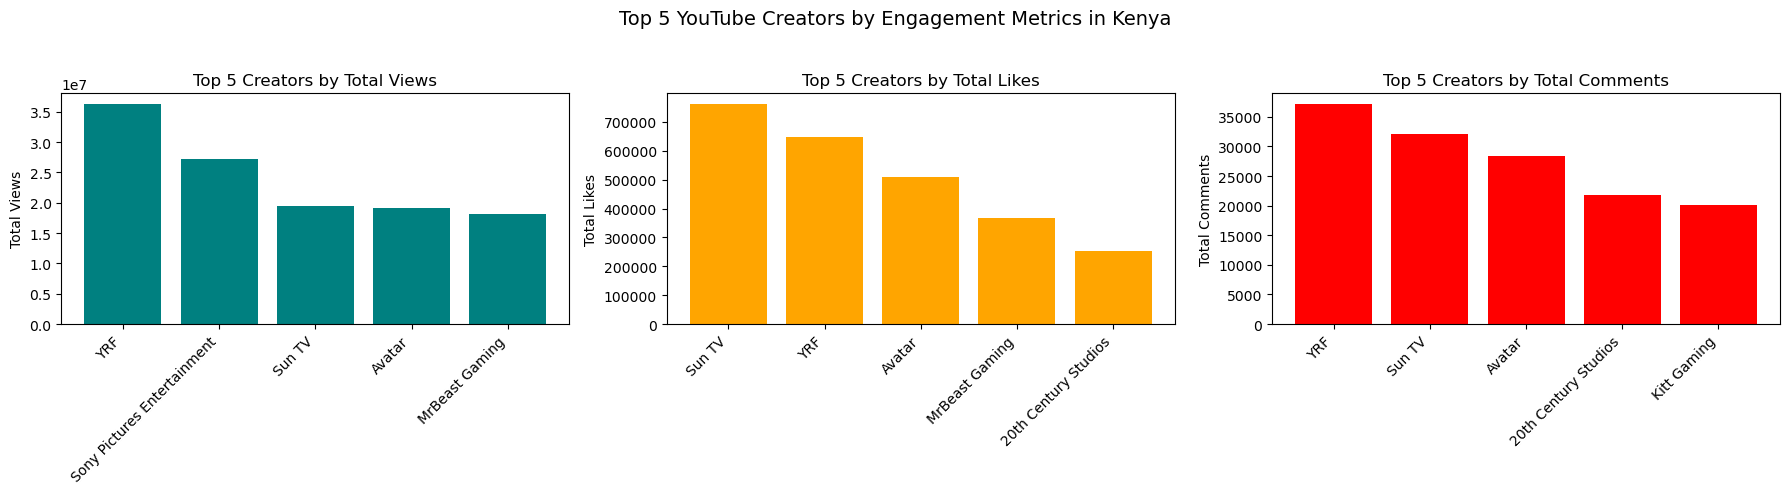

In [10]:
# Group by creator and calculate totals
creator_stats = df.groupby('channel_title').agg(
    total_views=('view_count', 'sum'),
    total_likes=('like_count', 'sum'),
    total_comments=('comment_count', 'sum'),
    uploads=('video_id', 'count')
).reset_index()

# Filter top 5 creators by each metric
top_views = creator_stats.nlargest(5, 'total_views')
top_likes = creator_stats.nlargest(5, 'total_likes')
top_comments = creator_stats.nlargest(5, 'total_comments')

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bar chart - Views
axes[0].bar(top_views['channel_title'], top_views['total_views'], color='teal')
axes[0].set_title('Top 5 Creators by Total Views')
axes[0].set_ylabel('Total Views')
axes[0].set_xticklabels(top_views['channel_title'], rotation=45, ha='right')

# Bar chart - Likes
axes[1].bar(top_likes['channel_title'], top_likes['total_likes'], color='orange')
axes[1].set_title('Top 5 Creators by Total Likes')
axes[1].set_ylabel('Total Likes')
axes[1].set_xticklabels(top_likes['channel_title'], rotation=45, ha='right')

# Bar chart - Comments
axes[2].bar(top_comments['channel_title'], top_comments['total_comments'], color='red')
axes[2].set_title('Top 5 Creators by Total Comments')
axes[2].set_ylabel('Total Comments')
axes[2].set_xticklabels(top_comments['channel_title'], rotation=45, ha='right')

# Layout
fig.suptitle('Top 5 YouTube Creators by Engagement Metrics in Kenya', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### 5. Metrics Distribution

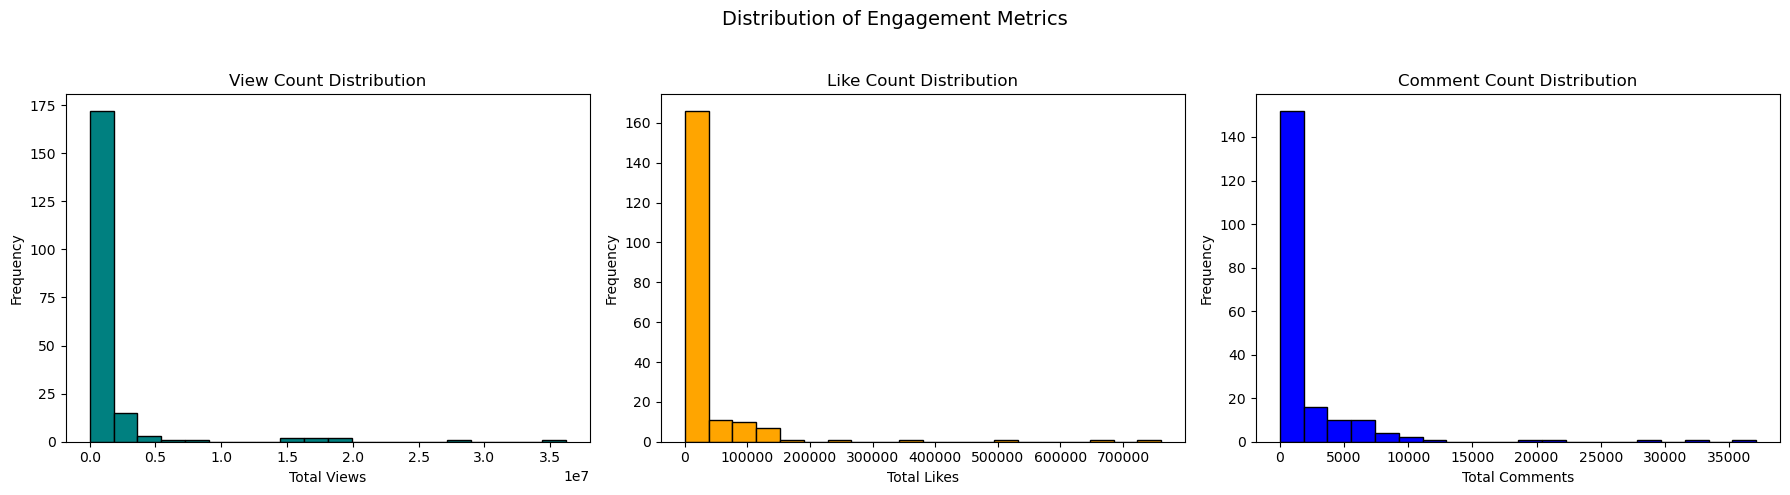

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# A. Views
axes[0].hist(df['view_count'], bins=20, color='teal', edgecolor='black')
axes[0].set_title('View Count Distribution')
axes[0].set_xlabel('Total Views')
axes[0].set_ylabel('Frequency')

# B. Likes
axes[1].hist(df['like_count'], bins=20, color='orange', edgecolor='black')
axes[1].set_title('Like Count Distribution')
axes[1].set_xlabel('Total Likes')
axes[1].set_ylabel('Frequency')

# C. Comments
axes[2].hist(df['comment_count'], bins=20, color='blue', edgecolor='black')
axes[2].set_title('Comment Count Distribution')
axes[2].set_xlabel('Total Comments')
axes[2].set_ylabel('Frequency')

# Layout
plt.suptitle('Distribution of Engagement Metrics', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### 6. Correlation Matrix of Engagement Metrics

In [12]:
engagement_metrics = df[['view_count', 'like_count', 'comment_count']]


In [13]:
corr_matrix = engagement_metrics.corr()
print(corr_matrix)

               view_count  like_count  comment_count
view_count       1.000000    0.833485       0.756897
like_count       0.833485    1.000000       0.880113
comment_count    0.756897    0.880113       1.000000


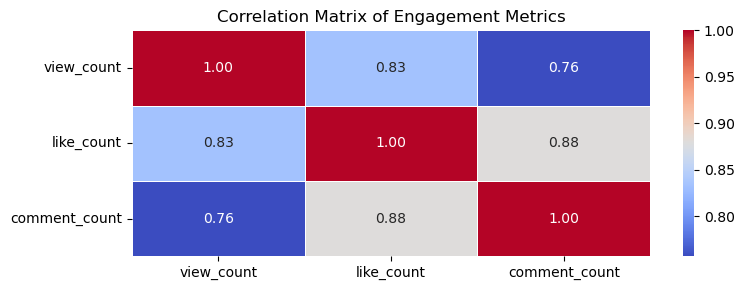

In [14]:
plt.figure(figsize=(8, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Engagement Metrics')
plt.tight_layout()
plt.show()

**Interpretation:**

``Views & Likes (0.83):`` Strong positive correlation. Popular videos (by views) tend to get more likes.

``Likes & Comments (0.88):`` Very strong correlation. Videos that receive likes also tend to attract comments — suggesting strong audience engagement.

``Views & Comments (0.76):`` Also a strong correlation, though slightly less than likes.

#### 7. Video Length vs View Count

In [19]:
def get_duration_range(seconds):
    if seconds < 300:
        return 'Under 5 min'
    elif seconds < 600:
        return '5–10 min'
    elif seconds < 1200:
        return '10–20 min'
    elif seconds < 3600:
        return '20–60 min'
    elif seconds < 7200:
        return '60–120 min'
    else:
        return 'Over 120 min'

df['duration_range']=df['duration_seconds'].apply(get_duration_range)

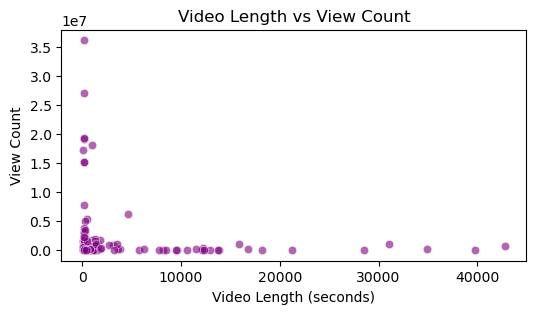

In [20]:
# scatter plot for video length vs view count
plt.figure(figsize=(6, 3))
sns.scatterplot(x='duration_seconds', y='view_count', data=df, alpha=0.6, color='purple')
plt.title('Video Length vs View Count')
plt.xlabel('Video Length (seconds)')
plt.ylabel('View Count')
plt.show()


In [21]:
views_by_duration= df.groupby('duration_range')['view_count'].sum().sort_values(ascending=False)

views_by_duration

duration_range
Under 5 min     227402531
10–20 min        31300447
5–10 min         19742332
20–60 min        18590847
60–120 min        6895568
Over 120 min      4589050
Name: view_count, dtype: int64

In [22]:
likes_by_duration= df.groupby('duration_range')['like_count'].sum().sort_values(ascending=False)

likes_by_duration

duration_range
Under 5 min     4522631
10–20 min        708089
20–60 min        649135
5–10 min         404206
60–120 min       175087
Over 120 min      59856
Name: like_count, dtype: int64

In [23]:
comments_by_duration= df.groupby('duration_range')['comment_count'].sum().sort_values(ascending=False)

comments_by_duration

duration_range
Under 5 min     270167
10–20 min        71884
20–60 min        41568
5–10 min         29353
60–120 min        8505
Over 120 min       715
Name: comment_count, dtype: int64

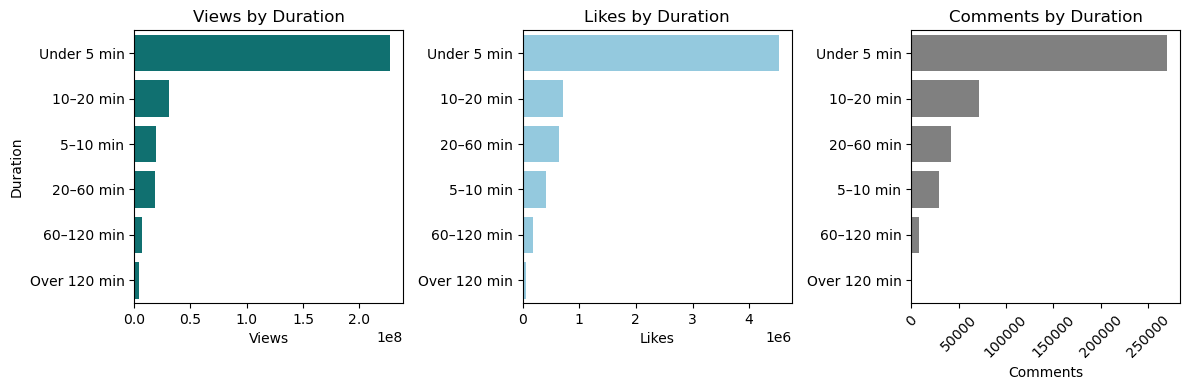

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4)) 

# Views 
sns.barplot(y=views_by_duration.index, x=views_by_duration.values, ax=axs[0], color='teal')
axs[0].set_title('Views by Duration')
axs[0].set_xlabel('Views')
axs[0].set_ylabel('Duration')

# Likes
sns.barplot(y=likes_by_duration.index, x=likes_by_duration.values, ax=axs[1], color='skyblue')
axs[1].set_title('Likes by Duration')
axs[1].set_xlabel('Likes')
axs[1].set_ylabel('')  

# Comments
sns.barplot(y=comments_by_duration.index, x=comments_by_duration.values, ax=axs[2], color='grey')
axs[2].set_title('Comments by Duration')
axs[2].set_xlabel('Comments')
axs[2].set_ylabel('')  
axs[2].tick_params(axis='x', rotation=45)

# Layout adjustment
plt.tight_layout()
plt.show()


In [25]:
df.columns

Index(['video_id', 'video_url', 'title', 'description', 'published_at',
       'publish_date', 'publish_time', 'day_of_week', 'hour', 'channel_id',
       'channel_title', 'category_id', 'category_name', 'tags', 'duration',
       'duration_seconds', 'duration_minutes', 'definition', 'caption',
       'view_count', 'like_count', 'favorite_count', 'comment_count',
       'duration_range'],
      dtype='object')

#### 9. Description Analysis 
Investigating whether having a description (and its length) affects engagement.

In [26]:
from wordcloud import WordCloud, STOPWORDS
# Combine all descriptions into one cleaned string
descriptions = df['description'].dropna().astype(str)

# Remove URLs and special characters
descriptions = descriptions.apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))
descriptions = descriptions.apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))  

# Combine all descriptions
all_descriptions = ' '.join(descriptions)

# Define stopwords (default + custom)
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'https', 'http', 'www', 'com', 'youtube', 'video', 'channel',
    'like', 'subscribe', 'watch', 'follow', 'get', 'click', 'link', 'see', 'new', 'one'
])

In [29]:
# Generate the word cloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    stopwords=custom_stopwords,
    colormap='magma',
    max_words=200
).generate(all_descriptions)

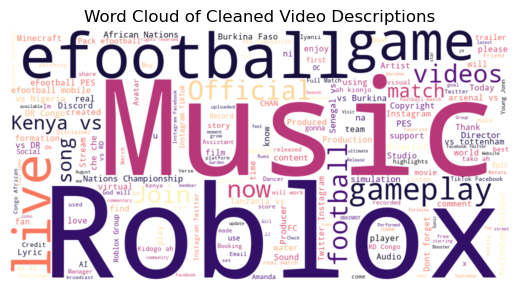

In [34]:
# Plot the word cloud
plt.figure(figsize=(10, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Video Descriptions')
plt.tight_layout()
plt.show()

In [32]:
import os
# Define output path
output_path = 'data/processed/visualization_dataset.csv'

# Create folder if it doesn't exist
os.makedirs(os.path.dirname(output_path), exist_ok=True)

In [33]:
# Save CSV
df.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}")

Cleaned dataset saved to data/processed/visualization_dataset.csv
